Используя уравнение Шредингера, найти связные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы:

$V(x) = \begin{cases} -U, & |x| < a \\ 0, & |x| \ge a \end{cases}$

где a - ширина ямы. Построить графически обоснованные функции.

# Решение:

При анализе потенциальной ямы с конечной глубиной есть несколько условий, которые нужно учесть для волновой функции на границах ямы:

1. На границах ямы волновая функция должна быть равна нулю, так как частица не может находиться за пределами ямы, где энергия бесконечна.

2. Волновая функция и её производная должны быть непрерывны на границах ямы. Это нужно для того, чтобы функция была гладкой и не имела разрывов.

Эта задача решается с использованием уравнения Шрёдингера для частицы в одномерной потенциальной яме. Уравнение Шрёдингера для частицы с массой m и энергией E в одномерном пространстве имеет вид:
$$
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) = E \psi(x)
\end{equation}
$$, где
$\psi(x)$ - волновая функция
$V(x)$ - потенциал
E - энергия частицы

Связанные состояния частицы в потенциальной яме — это такие состояния, для которых энергия E < 0 => частица находится в области, где её энергия не достаточна для того, чтобы покинуть яму (то есть она остается внутри ямы, её волновая функция убывает на бесконечности).

Задача решается численно с использованием метода дискретизации и матрицы Гамильтона. 
Мы разбиваем пространство на равномерную сетку и аппроксимируем дифференциальное уравнение Шрёдингера с помощью разностей второй производной для кинетической энергии.

Зададим начальные параметры, сетку координат и потенциал. Для удобства используем условные единицы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh


# Число измерений и состояний
MEASURE_COUNT = 500

# Значения
hbar = 1.
m = 1.

# Значения потенциальной ямы
a = 1.
U = 100.

# Координаты
x = np.linspace(-a, a, MEASURE_COUNT)
dx = 2 * a / (MEASURE_COUNT - 1)

# Потенциал
V = np.zeros_like(x)
V[np.abs(x) < a] = -U
V[np.abs(x) >= a] = 0.

Будем приближать вторую производную с помощью метода коенчных разностей. Мы задали MEASURE_COUNT точек с шагом dx, а значит

$$
\frac{d^2\psi(x)}{dx^2} \approx \frac{\psi_{i + 1} - 2 \psi_i + \psi_{i - 1}}{dx^2}
$$

$\psi_i$ - значение функции $\psi$ в точке $x_i$

Подставим:
$$
-\frac{\hbar^2}{2m} \cdot \frac{\psi_{i + 1} - 2 \psi_i + \psi_{i - 1}}{dx^2} + V_i \psi_i = E \psi_i \\
-\frac{\hbar^2}{2mdx^2} \cdot (\psi_{i + 1} - 2 \psi_i + \psi_{i - 1}) + V_i \psi_i = E \psi_i
$$

Вынесем коэффициенты:

Перед $\psi_{i-1}$ и $\psi_{i + 1}$ появляется коэффициент $$K = - \frac{\hbar^2}{2mdx^2}$$

Перед $\psi_i$ появляется $$D = \frac{2\hbar^2}{2mdx^2} + V_i = -2K + V_i$$

Тогда получим 
$$
K \psi_{i-1} + K \psi_{i + 1} + D \psi_i = E \psi_i
$$

В матричной форме: $$\hat{H} \overrightarrow{\psi} = E \overrightarrow{\psi}$$

Где
- $\hat{H}$ - матрица Гамильтониана
- $\overrightarrow{\psi}$ - вектор значений волновой функции [$\psi_1, \psi_2, ..., \psi_N$]
- $E$ - собственное значение энергии

In [2]:
K = -hbar**2 / (2 * m * dx**2)

H = np.zeros((MEASURE_COUNT, MEASURE_COUNT))

for i in range(MEASURE_COUNT):
    H[i, i] = -2 * K + V[i]
    if i > 0: H[i, i - 1] = H[i - 1, i] = K
    
pd.set_option('display.max_columns', 10)
pd.DataFrame(np.round(H, 2))

,0,1,2,3,4,...,495,496,497,498,499
0,62250.25,-31125.13,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1,-31125.13,62150.25,-31125.13,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
2,0.00,-31125.13,62150.25,-31125.13,0.00,...,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,-31125.13,62150.25,-31125.13,...,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,-31125.13,62150.25,...,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
495,0.00,0.00,0.00,0.00,0.00,...,62150.25,-31125.13,0.00,0.00,0.00
496,0.00,0.00,0.00,0.00,0.00,...,-31125.13,62150.25,-31125.13,0.00,0.00
497,0.00,0.00,0.00,0.00,0.00,...,0.00,-31125.13,62150.25,-31125.13,0.00
498,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-31125.13,62150.25,-31125.13


Найдем собственные значения E и собственные функции PSI ($\psi(x)$).

In [3]:
E, PSI = eigh(H)
E = E[E < 0]

pd.DataFrame([round(e, 2) for e in E], columns=['Собственное значение'], index=range(1, len(E) + 1))

,Собственное значение
1,-98.78
2,-95.10
3,-88.99
4,-80.42
5,-69.40
6,-55.94
7,-40.04
8,-21.69
9,-0.89


И отнормируем волновые функции для выполнения условия нормировки:
$$\int |\psi(x)|^2 dx = 1$$
$|\psi(x)|^2$ - плотность вероятности нахождения частицы в точке x
Для нашей дискретной сетки с шагом dx:
$$\sum_{i=1}^N |\psi(x_i)|^2 \cdot dx = 1$$
Для нормировки делим каждое значение функции на 
$$\sqrt{\sum_{i = 1}^N |\phi(x_i)|^2 \cdot dx}$$

In [4]:
PSI = PSI / np.sqrt(np.sum(PSI**2, axis=0) * dx)

Теперь можем построить графики

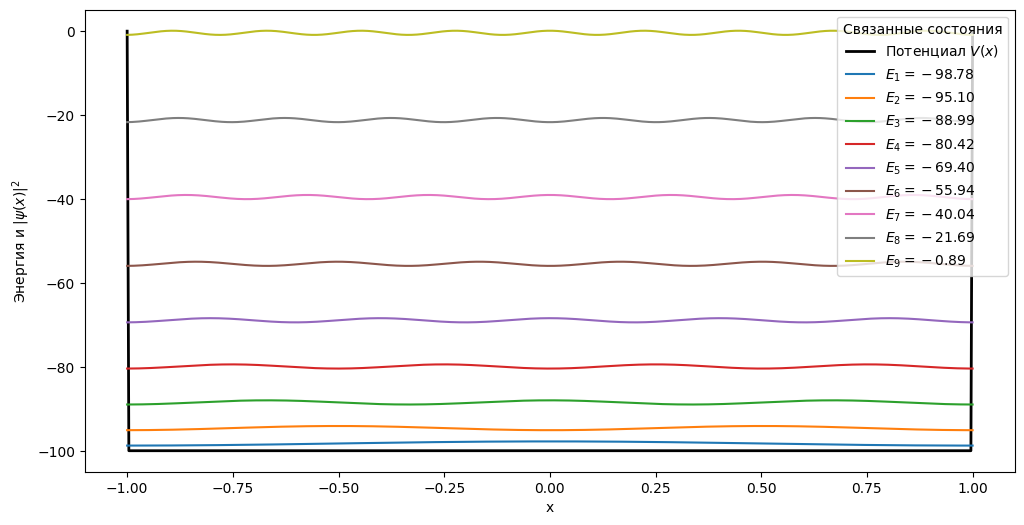

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(x, V, label="Потенциал $V(x)$", color="black", linewidth=2.)

for i, (e, psi) in enumerate(zip(E, PSI.T)):
    plt.plot(x, psi**2 + e, label=f"$E_{i+1} = {e:.2f}$")

plt.xlabel("x")
plt.ylabel("Энергия и $|\\psi(x)|^2$")
plt.legend(title="Связанные состояния")

plt.show()